In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from google.colab import files
from matplotlib import colors

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.expand_frame_repr', False)


###WHO Data

In [4]:
!pip install pandas openpyxl


In [5]:
WHO_2023 = pd.ExcelFile('/content/drive/My Drive/Data_science_project/WHO-UCN-TB-2023.7-eng.xlsx')

In [ ]:
sheet_names = WHO_2023.sheet_names
print("Available Sheets:", sheet_names)

Available Sheets: ['Catalogue_master_file', 'Genomic_coordinates']


In [ ]:
WHO_2023_mutations = pd.read_excel(WHO_2023, sheet_name='Catalogue_master_file', header=2)


In [ ]:
WHO_2021=pd.ExcelFile('/content/drive/My Drive/Data_science_project/WHO-UCN-GTB-PCI-2021.7-eng.xlsx')

In [ ]:
sheet_names_2021 = WHO_2021.sheet_names
print("Available Sheets:", sheet_names_2021)

Available Sheets: ['Notes', 'Mutation_catalogue', 'Legend_catalogue', 'Genome_indices', 'Legend_indices']


In [ ]:
WHO_2021_mutations = pd.read_excel(WHO_2021, sheet_name='Mutation_catalogue', header=None)
WHO_2021_mutations.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,drug,tier,variant (common_name),Genome position,DATASET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INITIAL CONFIDENCE GRADING,DATASET(S),Previous WHO guidance,NaN,NaN,NaN,WHO-endorsed gDST assays,NaN,NaN,NaN,NaN,NaN,NaN,Additional grading criteria,FINAL CONFIDENCE GRADING
1,NaN,NaN,NaN,NaN,algorithm pass,Present_SOLO_R,Present_SOLO_SR,Present_S,Absent_S,Present_R,Absent_R,PPV,PPV_lb,PPV_ub,PPV | SOLO,PPV | SOLO_lb,PPV | SOLO_ub,Sensitivity,Sensitivity_lb,Sensitivity_ub,Specificity,Specificity_lb,Specificity_ub,LR+,LR+_lb,LR+_ub,LR-,LR-_lb,LR-_ub,OR,OR_lb,OR_ub,OR SOLO,OR SOLO_lb,OR SOLO_ub,OR SOLO_FE-sig,Neutral masked,NaN,NaN,Miotto et al. (PMID 29284687),NGS Guide 2018,Level of resistance to INH or MXF,RIF CC guide 2021,Hain GenoType MTBDRplus V2.0,Nipro Genoscholar NTM+MDRTB II,Cepheid Xpert MTB/RIF,Cepheid Xpert MTB/RIF Ultra,Hain GenoType MTBDRsl V2.0,Cepheid Xpert MTB/XDR,Nipro Genoscholar PZA-TB II,NaN,NaN
2,AMI,1,rrs_a1401g,1473246,1,918,966,50,15640,939,349,0.949444,0.933888,0.962247,0.948347,0.932466,0.961423,0.729037,0.703872,0.753153,0.996813,0.995801,0.997634,228.771894,180.330021,Inf,0.271829,0.25139,Inf,841.602292,653.319385,Inf,857.063037,656.77984,Inf,True,0,Assoc w R,ALL+WHO,Assoc w R,Assoc w R,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,Covered,NaN,NaN,1) Assoc w R
3,AMI,1,eis_c-14t,2715346,1,28,77,51,7325,32,632,0.385542,0.280692,0.498812,0.35443,0.250006,0.470126,0.048193,0.033194,0.067356,0.993086,0.990919,0.994848,6.969998,4.692709,Inf,0.958434,0.942249,Inf,7.272276,4.835102,Inf,6.622966,4.305923,Inf,True,0,Assoc w R,WHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,NaN,NaN,1) Assoc w R
4,AMI,1,rrs_g1484t,1473329,1,5,7,2,15688,6,1282,0.75,0.349144,0.968146,0.714286,0.290421,0.963307,0.004658,0.001711,0.010112,0.999873,0.99954,0.999985,36.545031,8.1369,Inf,0.995469,0.990934,Inf,36.711388,8.153219,Inf,30.592824,6.330071,Inf,True,0,Assoc w R,ALL,Assoc w R,Assoc w R,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,NaN,NaN,Evidence from ALL dataset only,2) Assoc w R - Interim


In [ ]:
new_columns = WHO_2021_mutations .iloc[0].fillna('') + ' ' + WHO_2021_mutations .iloc[1].fillna('')

In [ ]:
WHO_2021_mutations.columns = new_columns
WHO_2021_mutations = WHO_2021_mutations.drop([0, 1])
WHO_2021_mutations = WHO_2021_mutations.reset_index(drop=True)
WHO_2021_mutations.head(5)

,drug,tier,variant (common_name),Genome position,DATASET algorithm pass,Present_SOLO_R,Present_SOLO_SR,Present_S,Absent_S,Present_R,Absent_R,PPV,PPV_lb,PPV_ub,PPV | SOLO,PPV | SOLO_lb,PPV | SOLO_ub,Sensitivity,Sensitivity_lb,Sensitivity_ub,Specificity,Specificity_lb,Specificity_ub,LR+,LR+_lb,LR+_ub,LR-,LR-_lb,LR-_ub,OR,OR_lb,OR_ub,OR SOLO,OR SOLO_lb,OR SOLO_ub,OR SOLO_FE-sig,Neutral masked,INITIAL CONFIDENCE GRADING,DATASET(S),Previous WHO guidance Miotto et al. (PMID 29284687),NGS Guide 2018,Level of resistance to INH or MXF,RIF CC guide 2021,WHO-endorsed gDST assays Hain GenoType MTBDRplus V2.0,Nipro Genoscholar NTM+MDRTB II,Cepheid Xpert MTB/RIF,Cepheid Xpert MTB/RIF Ultra,Hain GenoType MTBDRsl V2.0,Cepheid Xpert MTB/XDR,Nipro Genoscholar PZA-TB II,Additional grading criteria,FINAL CONFIDENCE GRADING
0,AMI,1,rrs_a1401g,1473246,1,918,966,50,15640,939,349,0.949444,0.933888,0.962247,0.948347,0.932466,0.961423,0.729037,0.703872,0.753153,0.996813,0.995801,0.997634,228.771894,180.330021,Inf,0.271829,0.25139,Inf,841.602292,653.319385,Inf,857.063037,656.77984,Inf,True,0,Assoc w R,ALL+WHO,Assoc w R,Assoc w R,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,Covered,NaN,NaN,1) Assoc w R
1,AMI,1,eis_c-14t,2715346,1,28,77,51,7325,32,632,0.385542,0.280692,0.498812,0.35443,0.250006,0.470126,0.048193,0.033194,0.067356,0.993086,0.990919,0.994848,6.969998,4.692709,Inf,0.958434,0.942249,Inf,7.272276,4.835102,Inf,6.622966,4.305923,Inf,True,0,Assoc w R,WHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,NaN,NaN,1) Assoc w R
2,AMI,1,rrs_g1484t,1473329,1,5,7,2,15688,6,1282,0.75,0.349144,0.968146,0.714286,0.290421,0.963307,0.004658,0.001711,0.010112,0.999873,0.99954,0.999985,36.545031,8.1369,Inf,0.995469,0.990934,Inf,36.711388,8.153219,Inf,30.592824,6.330071,Inf,True,0,Assoc w R,ALL,Assoc w R,Assoc w R,NaN,NaN,NaN,NaN,NaN,NaN,Recognised as marker for R,NaN,NaN,Evidence from ALL dataset only,2) Assoc w R - Interim
3,AMI,1,rrs_c1402t,1473247,1,4,13,10,15680,5,1283,0.333333,0.118241,0.616196,0.285714,0.083889,0.581035,0.003882,0.001262,0.009036,0.999363,0.998828,0.999694,6.090839,2.012091,Inf,0.996753,0.992491,Inf,6.110678,2.013793,Inf,5.431714,1.549475,Inf,False,0,Uncertain significance,ALL+WHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Covered,Recognised as marker for R,NaN,WHO-endorsed gDST assay,2) Assoc w R - Interim
4,AMI,2,whiB6_A77V,NaN,1,3,100,97,15593,3,141,0.03,0.00623,0.085176,0.03,0.00623,0.085176,0.020833,0.004317,0.059675,0.993818,0.992463,0.994984,3.369845,0.90749,Inf,0.985258,0.952915,Inf,3.420268,0.906964,Inf,3.420268,0.906964,Inf,False,0,Uncertain significance,ALL+WHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3) Uncertain significance


In [ ]:
drug_mapping = {
    'AMI': 'Amikacin',
    'BDQ': 'Bedaquiline',
    'CAP': 'Capreomycin',
    'CFZ': 'Clofazimine',
    'DLM': 'Delamanid',
    'EMB': 'Ethambutol',
    'ETH': 'Ethionamide',
    'INH': 'Isoniazid',
    'KAN': 'Kanamycin',
    'LEV': 'Levofloxacin',
    'LZD': 'Linezolid',
    'MXF': 'Moxifloxacin',
    'PZA': 'Pyrazinamide',
    'RIF': 'Rifampicin',
    'STM': 'Streptomycin'
}

In [ ]:
WHO_2021_mutations['drug '] = WHO_2021_mutations['drug '].replace(drug_mapping)
WHO_2021_mutations['gene'] = WHO_2021_mutations['variant (common_name) '].str.split('_').str[0]

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 70.1 MB/s eta 0:00:00


###Countries

In [19]:
country_origin=pd.read_excel('/content/drive/My Drive/Data_science_project/Acession-Numbers.xlsx',header=1)
country_counts=country_origin['Country'].value_counts()

Text(0.5, 1.0, 'Samples distribution by country')

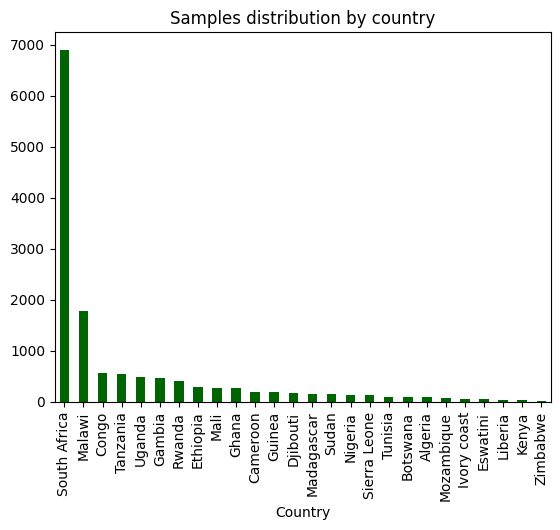

In [7]:
country_counts.plot(kind='bar', color='darkgreen')
plt.title('Samples distribution by country')

In [20]:
country_origin.head(5)

,Name,Country
0,ERR6397155,Ethiopia
1,ERR3324331,Liberia
2,SRR1010997,Uganda
3,SRR1577832,Mali
4,ERR2706950,Congo


In [21]:
country_dictionary=dict(zip(country_origin['Name'], country_origin['Country']))

###Maps

<ipython-input-21-eaa56f770fd8>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


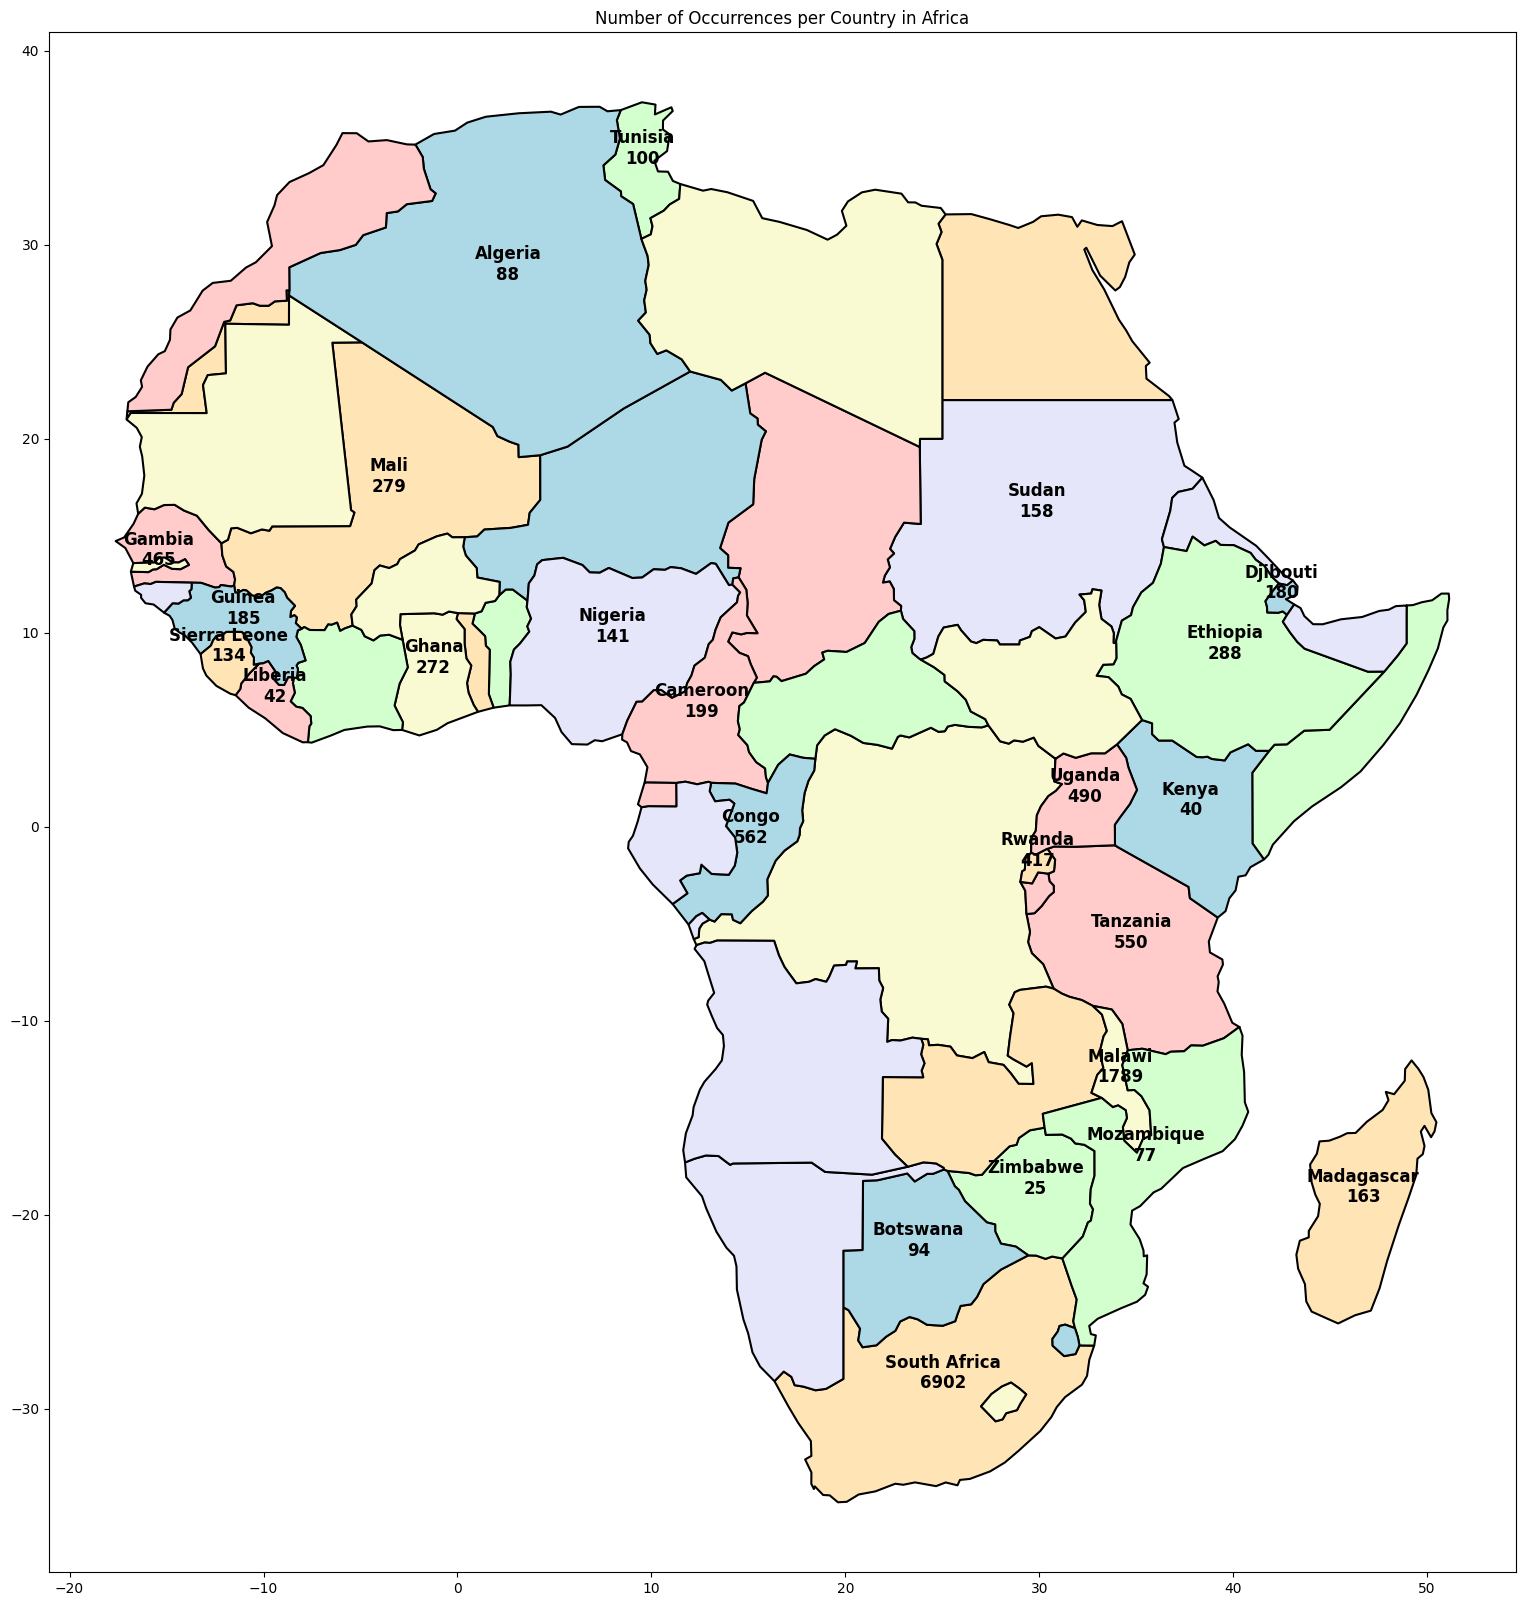

In [ ]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

africa = world[(world['continent'] == 'Africa')]
light_cmap = colors.ListedColormap(['#ffcccb', '#ffe4b5', '#fafad2', '#d3ffce', '#add8e6', '#e6e6fa'])
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
africa.plot(ax=ax, cmap=light_cmap, edgecolor='black', linewidth=1.5 )

# Add the country counts as text on the map
for idx, row in africa.iterrows():
    country_name = row['name']
    if country_name in country_counts:
        # Get the centroid of the country to place the text
        centroid = row['geometry'].centroid
        label = f"{country_name}\n{country_counts[country_name]}"
        ax.text(centroid.x, centroid.y,label,
                horizontalalignment='center', fontsize=12, color='k',weight="bold")

plt.title('Number of Occurrences per Country in Africa')
plt.show()


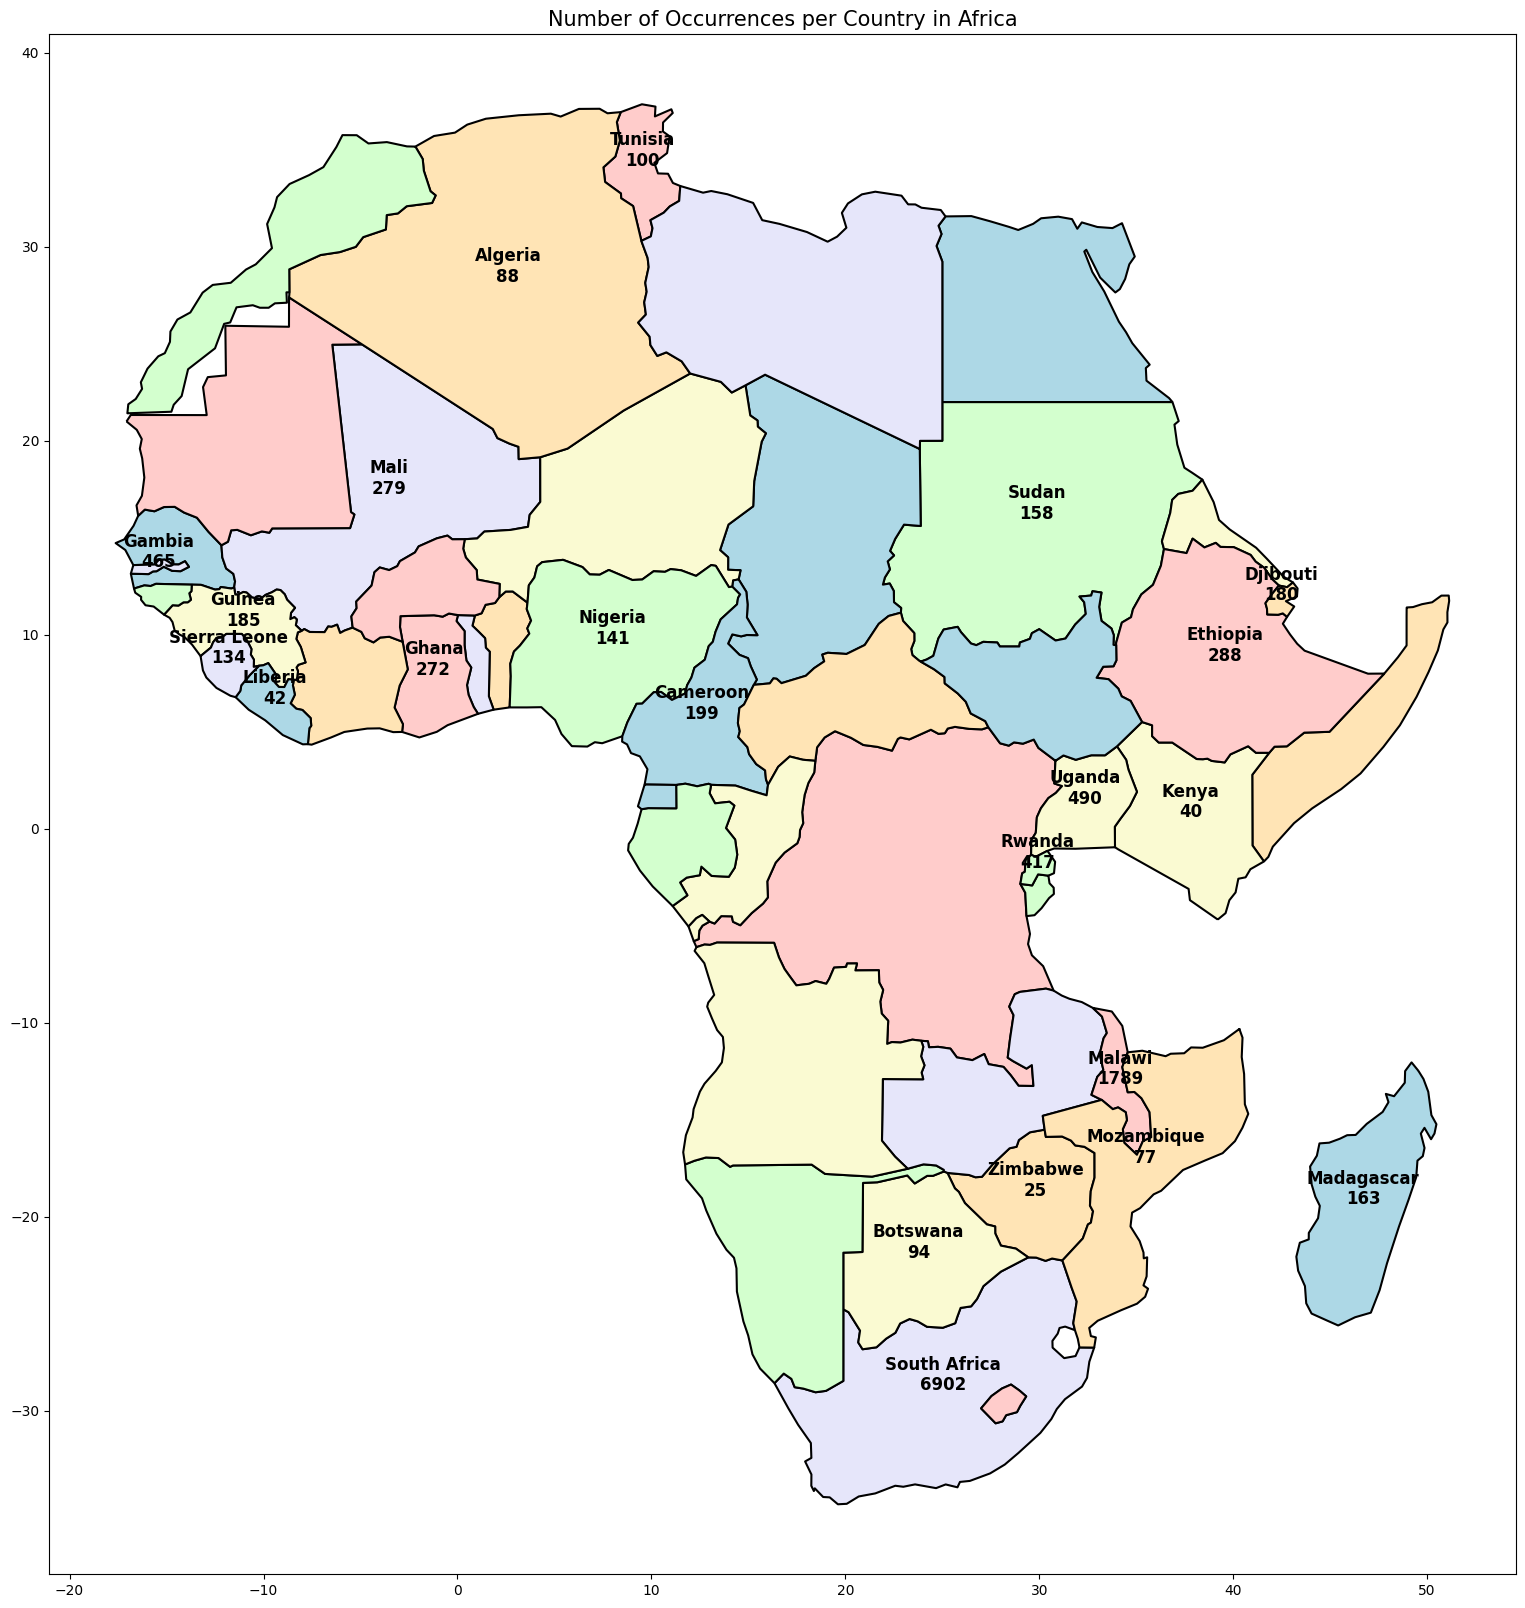

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import requests
import zipfile
import os


url = "https://drive.google.com/uc?export=download&id=1OWyIwV6JD16CPrMcJ-0ma2kOlzHLCX_y"
local_zip_filename = "map_files.zip"

response = requests.get(url)
with open(local_zip_filename, 'wb') as file:
    file.write(response.content)


with zipfile.ZipFile(local_zip_filename, 'r') as zip_ref:
    zip_ref.extractall("shapefiles")


shapefile_path = os.path.join("shapefiles", "ne_110m_admin_0_countries.shp")
map = gpd.read_file(shapefile_path)


african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
    'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
    'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'São Tomé and Príncipe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]


africa = map[map['SOVEREIGNT'].isin(african_countries)]


light_cmap = colors.ListedColormap(['#ffcccb', '#ffe4b5', '#fafad2', '#d3ffce', '#add8e6', '#e6e6fa'])


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
africa.plot(ax=ax, cmap=light_cmap, edgecolor='black', linewidth=1.5)


for idx, row in africa.iterrows():
    country_name = row['SOVEREIGNT']
    if country_name in country_counts:
        centroid = row['geometry'].centroid
        label = f"{country_name}\n{country_counts[country_name]}"
        ax.text(
            centroid.x,
            centroid.y,
            label,
            horizontalalignment='center',
            fontsize=12,
            color='k',
            weight='bold'
        )


plt.title('Number of Occurrences per Country in Africa', fontsize=15)

plt.show()


###Network

In [ ]:
!pip install pyvis
from pyvis.network import Network

In [ ]:
resistance_mutations=pd.read_excel('/content/drive/My Drive/Data_science_project/WHO-resistance-associated-mutations.xlsx',header=1)
drug_position = resistance_mutations.groupby('Drug')['Genomic position '].apply(list).to_dict()
resistance_mutations['Drug'] = resistance_mutations['Drug'].replace(drug_mapping)
net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='k', notebook=True, cdn_resources='in_line')

for idx, row in resistance_mutations.iterrows():
    drug = row['Drug']
    gene = row['Gene']
    variation = row['Variation']
    added_drugs = set()
    added_variation=set()
    if drug not in added_drugs:
        net.add_node(drug, label=drug, color='green', shape='dot', size=30)
        added_drugs.add(drug)
    if variation not in added_variation:
        net.add_node(variation, label=variation, color='blue', shape='triangle', size=10)
        added_variation.add(variation)


    net.add_edge(drug, variation,label=gene, color='k')


net.show('drug_gene_network.html')



drug_gene_network.html


In [ ]:
resistance_mutations.head(5)

,Drug,Gene,Variation,Genomic position
0,Amikacin,rrs,a1401g,1473246.0
1,Amikacin,eis,c-14t,2715346.0
2,Capreomycin,rrs,a1401g,1473246.0
3,Capreomycin,tlyA,N236K,NaN
4,Capreomycin,rrs,c1402t,1473247.0


###Pie Plots

In [ ]:
lineage_country=pd.read_excel('/content/drive/My Drive/Data_science_project/Lineage-drug-resitance-classifiation.xlsx',header=1)

In [ ]:
lineage_country.head(5)

,Name,Country,Lineage,Drug
0,ERR6397155,Ethiopia,lineage 3,Mono
1,ERR3324331,Liberia,lineage 4,Mono
2,SRR1010997,Uganda,lineage 4,Mono
3,SRR1577832,Mali,lineage 2,Other
4,ERR2706950,Congo,lineage 5,MDR


In [ ]:
Lineage_resistance_dictionary = lineage_country.set_index('Name')[['Lineage', 'Drug']].T.apply(list).to_dict()



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


filtered_lineage_country = lineage_country.dropna(subset=['Lineage'])
filtered_lineage_country = filtered_lineage_country[filtered_lineage_country['Lineage'] != '-']
unique_lineages = filtered_lineage_country['Lineage'].unique()
unique_drugs = filtered_lineage_country['Drug'].unique()
color_map = {drug: color for drug, color in zip(unique_drugs, px.colors.qualitative.Safe)}


n_rows = 2
n_cols = (len(unique_lineages) + 1) // n_rows


fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=[f"{lineage}" for lineage in unique_lineages],
                    specs=[[{'type':'domain'}]*n_cols]*n_rows)


for i, lineage in enumerate(unique_lineages):
    col= i // n_rows + 1
    row = i % n_rows + 1


    filtered_df = filtered_lineage_country[filtered_lineage_country['Lineage'] == lineage]


    sunburst = px.sunburst(
        filtered_df,
        path=["Drug", "Country"],
        values=None,
        color='Drug',
        color_discrete_map=color_map,

        maxdepth=3,
        height=400,
        width=600
    )


    fig.add_trace(sunburst['data'][0], row=row, col=col)


fig.update_layout(
    height=300 * n_rows,
    width=500 * 0.6*n_cols,

    showlegend=False,
    margin=dict(t=25, l=0, r=0, b=0)
)


fig.show()


In [ ]:
fig.write_html("sunburst_chart.html")

In [ ]:
fig = px.sunburst(
    filtered_lineage_country,
    path=['Lineage'],
    values=None,

    color_discrete_sequence=px.colors.qualitative.Set3
)


fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()
fig = px.sunburst(
    filtered_lineage_country,
    path=['Drug'],
    values=None,

    color_discrete_sequence=px.colors.qualitative.Set3
)


fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()
fig = px.sunburst(
    filtered_lineage_country,
    path=['Country'],
    values=None,

    color_discrete_sequence=px.colors.qualitative.Set3
)


fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()

In [ ]:
fig.write_html("resist_drug.html")

###AFRO_TB

In [ ]:
AFRO_TB=pd.read_excel('/content/drive/My Drive/Data_science_project/0-StartHERE_Afro-TB.xlsx', header=1,
                   skiprows=2)

In [ ]:
AFRO_TB.head(5)

,Name,Country,Lineage,Drug,tlyA N236K,embB Q497R,embB G406S,embB G406A,embB G406D,embB M306L,embB Q497K,embB D328Y,embB Y319C,embB M306V,embB D354A,embB Y319S,embB G406C,embB M306I,ethA Lys37fs,katG S315T,katG W328L,fabG1 Leu203Leu,fabG1 Leu203Leu.1,gyrA D94N,gyrA D94Y,gyrA S91P,gyrA D94G,gyrA D94A,gyrA D94H,rplC C154R,gyrB E501D,gyrA A90V,gyrA G88C,pncA F94C,pncA Val125 Glu127del,pncA H57R,pncA V7G,pncA H71R,pncA P69L,pncA D63A,pncA D12E,pncA I133T,pncA V180F,pncA V7A,pncA Gly132Val,pncA L4S,pncA V128G,pncA D12A,pncA W68C,pncA G24D,pncA D49A,pncA Gly132Ala,pncA A146T,pncA Q10P,pncA L85R,pncA M175V,pncA Val130Val,pncA H71P,pncA H71Y,pncA H57Y,pncA C14R,pncA Leu156Gln,pncA Val130fs,pncA Q141P,pncA Val155Val,pncA S164P,pncA T135P,pncA P54L,pncA L120P,pncA Arg154fs,pncA H57D,pncA Val130Gly,pncA Asp129del,pncA L27P,pncA V130G,pncA W68R,pncA L85P,pncA D49G,pncA G97S,pncA L159R,pncA G132A,pncA G97D,pncA Glu173Gly,pncA Leu156Pro,pncA K96T,pncA P62L,pncA W68G,pncA Val130Ala,pncA L172P,pncA G97C,pncA T142A,pncA I6T,pncA D8N,pncA L182S,pncA Phe106Leu,pncA F94L,pncA T142M,pncA A146V,pncA S67P,pncA W119C,pncA T76P,pncA L151S,pncA G132S,pncA D12G,pncA V125F,pncA Val125 Asp129del,pncA Q10R,pncA H51R,pncA L4W,pncA Glu127 Val128insValAspVal,pncA V139G,pncA Y103H,pncA K96R,pncA V139A,pncA R154G,pncA Glu173fs,pncA Y34D,pncA I31S,pncA S59P,pncA Val131Ala,pncA T47A,pncA K96E,pncA Val131fs,pncA H51D,pncA F58L,pncA D8G,pncA T160P,pncA A134V,pncA V180G,pncA Ala178Val,rpoB H445R,rpoB Q432L,rpoB Leu443Trp,rpoB S441L,rpoB Q432P,rpoB L452P,rpoB Leu443Ser,rpoB H445D,rpoB Gln432His,rpoB V170F,rpoB I491F,rpoB S450L,rpoB L430P,rpoB H445N,rpoB D435V,rpoB Gln432Gln,rpoB D435Y,rpoB Phe433dup,rpoB H445L,rpoB Q432K,rpoB H445Y,rpoB S450W,gid A134E,rpsL K88M,gid Arg118fs,gid Gly34fs,gid Leu35fs,gid P75R,rpsL K43R,rpsL K88R,gid G69D
0,ERR6397155,Ethiopia,lineage 3,Mono,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,INH,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,STM,_,_
1,ERR3324331,Liberia,lineage 4,Mono,_,_,_,_,_,EMB,_,_,_,_,_,_,_,_,_,INH,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_
2,SRR1010997,Uganda,lineage 4,Mono,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,RIF,_,_,_,_,_,_,_,_,_,_,_,STM,_,_,_,_,_,_,_
3,SRR1577832,Mali,lineage 2,Other,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,NaN,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,STM,_,_
4,ERR2706950,Congo,lineage 5,MDR,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,INH,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,PZA,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,RIF,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,STM,_,_


In [ ]:
AFRO_TB.iloc[:, 4:] = AFRO_TB.iloc[:, 4:].applymap(lambda x: 0 if pd.isna(x) or len(str(x)) < 2 else x)


<ipython-input-7-d5fb21eab396>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  AFRO_TB.iloc[:, 4:] = AFRO_TB.iloc[:, 4:].applymap(lambda x: 0 if pd.isna(x) or len(str(x)) < 2 else x)


In [ ]:
AFRO_TB.head(5)

,Name,Country,Lineage,Drug,tlyA N236K,embB Q497R,embB G406S,embB G406A,embB G406D,embB M306L,embB Q497K,embB D328Y,embB Y319C,embB M306V,embB D354A,embB Y319S,embB G406C,embB M306I,ethA Lys37fs,katG S315T,katG W328L,fabG1 Leu203Leu,fabG1 Leu203Leu.1,gyrA D94N,gyrA D94Y,gyrA S91P,gyrA D94G,gyrA D94A,gyrA D94H,rplC C154R,gyrB E501D,gyrA A90V,gyrA G88C,pncA F94C,pncA Val125 Glu127del,pncA H57R,pncA V7G,pncA H71R,pncA P69L,pncA D63A,pncA D12E,pncA I133T,pncA V180F,pncA V7A,pncA Gly132Val,pncA L4S,pncA V128G,pncA D12A,pncA W68C,pncA G24D,pncA D49A,pncA Gly132Ala,pncA A146T,pncA Q10P,pncA L85R,pncA M175V,pncA Val130Val,pncA H71P,pncA H71Y,pncA H57Y,pncA C14R,pncA Leu156Gln,pncA Val130fs,pncA Q141P,pncA Val155Val,pncA S164P,pncA T135P,pncA P54L,pncA L120P,pncA Arg154fs,pncA H57D,pncA Val130Gly,pncA Asp129del,pncA L27P,pncA V130G,pncA W68R,pncA L85P,pncA D49G,pncA G97S,pncA L159R,pncA G132A,pncA G97D,pncA Glu173Gly,pncA Leu156Pro,pncA K96T,pncA P62L,pncA W68G,pncA Val130Ala,pncA L172P,pncA G97C,pncA T142A,pncA I6T,pncA D8N,pncA L182S,pncA Phe106Leu,pncA F94L,pncA T142M,pncA A146V,pncA S67P,pncA W119C,pncA T76P,pncA L151S,pncA G132S,pncA D12G,pncA V125F,pncA Val125 Asp129del,pncA Q10R,pncA H51R,pncA L4W,pncA Glu127 Val128insValAspVal,pncA V139G,pncA Y103H,pncA K96R,pncA V139A,pncA R154G,pncA Glu173fs,pncA Y34D,pncA I31S,pncA S59P,pncA Val131Ala,pncA T47A,pncA K96E,pncA Val131fs,pncA H51D,pncA F58L,pncA D8G,pncA T160P,pncA A134V,pncA V180G,pncA Ala178Val,rpoB H445R,rpoB Q432L,rpoB Leu443Trp,rpoB S441L,rpoB Q432P,rpoB L452P,rpoB Leu443Ser,rpoB H445D,rpoB Gln432His,rpoB V170F,rpoB I491F,rpoB S450L,rpoB L430P,rpoB H445N,rpoB D435V,rpoB Gln432Gln,rpoB D435Y,rpoB Phe433dup,rpoB H445L,rpoB Q432K,rpoB H445Y,rpoB S450W,gid A134E,rpsL K88M,gid Arg118fs,gid Gly34fs,gid Leu35fs,gid P75R,rpsL K43R,rpsL K88R,gid G69D
0,ERR6397155,Ethiopia,lineage 3,Mono,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,STM,0,0
1,ERR3324331,Liberia,lineage 4,Mono,0,0,0,0,0,EMB,0,0,0,0,0,0,0,0,0,INH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SRR1010997,Uganda,lineage 4,Mono,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,RIF,0,0,0,0,0,0,0,0,0,0,0,STM,0,0,0,0,0,0,0
3,SRR1577832,Mali,lineage 2,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,STM,0,0
4,ERR2706950,Congo,lineage 5,MDR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PZA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,RIF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,STM,0,0


In [ ]:
AFRO_TB.iloc[:, 4:] = AFRO_TB.iloc[:, 4:].applymap(lambda x: 0 if type(x)==float else x)

<ipython-input-9-e651508fa9a7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  AFRO_TB.iloc[:, 4:] = AFRO_TB.iloc[:, 4:].applymap(lambda x: 0 if type(x)==float else x)


In [ ]:
len(AFRO_TB)

13753

###VCFPY

In [ ]:
!pip install
import vcfpy
import os
from glob import glob
from multiprocessing import Pool, cpu_count
import pickle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.2/993.2 kB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 73.8 MB/s eta 0:00:00
  Created wheel for vcfpy: filename=vcfpy-0.13.8-py2.py3-none-any.whl size=34401 sha256=e3693e4c2ee997de157c1742d5a2d778d1ce953d21fe15163580bfc978d1730f
  Stored in directory: /root/.cache/pip/wheels/f8/18/ae/1270a4895ffbb577ccf51ebe1396ce1dc6ce89f851079a2ec2
Successfully built vcfpy


In [ ]:
vcf_dir = '/content/drive/MyDrive/Data_science_project/AFRO_TB_VCF/'


In [ ]:

vcf_dir = '/content/drive/MyDrive/Data_science_project/AFRO_TB_VCF/'

vcf_files = glob(os.path.join(vcf_dir, '*.vcf.gz'))


total_files = len(vcf_files)
part_size = total_files //

def process_vcf_file(vcf_file):
    file_name = os.path.basename(vcf_file)
    key = file_name.split('_')[0]
    vcf_reader = vcfpy.Reader.from_path(vcf_file)
    records = [(key, record) for record in vcf_reader]
    return records

def process_vcf_files_batch(vcf_files_batch):
    all_records_batch = []
    cores = cpu_count()
    with Pool(processes=cores) as pool:
        for i, records in enumerate(pool.imap(process_vcf_file, vcf_files_batch)):
            all_records_batch.extend(records)
    return all_records_batch

def process_and_save_part(part_num, start, end):
    batch = vcf_files[start:end]
    all_records_part = process_vcf_files_batch(batch)
    save_path = f'/content/drive/MyDrive/Data_science_project/processed_vcf_records_part{part_num}.pkl'

    with open(save_path, 'wb') as f:
        pickle.dump(all_records_part, f)

    print(f"Finished processing and saving part {part_num}. Saved to {save_path}.")




# Part 1
#process_and_save_part(1, 0, part_size)

# Part 2
#process_and_save_part(2, part_size, 2 * part_size)

# Part 3
process_and_save_part(3, 2 * part_size, total_files)






Finished processing and saving part 3. Saved to /content/drive/MyDrive/Data_science_project/processed_vcf_records_part3.pkl.


###AFRO_TB+Genomic data

In [ ]:

file_path = '/content/drive/MyDrive/Data_science_project/processed_vcf_records_part3.pkl'

with open(file_path, 'rb') as file:
    data_part_3 = pickle.load(file)



In [ ]:
data_3 = []

for i in range(len(data_part_3) - 1, -1, -1):
    second_value = data_part_3[i][1]
    data_3.append(second_value)
    data_part_3.pop(i)




In [ ]:
def extract_genetic_data(record_data):

    sample_id = record_data.calls[0].sample


    simplified_data = {
        'Sample ID': sample_id,
        'Position': record_data.POS,
        'Reference Nucleotide': record_data.REF,
    }


    if record_data.ALT and len(record_data.ALT) > 0:
        substitution = record_data.ALT[0]
        simplified_data['Substitution_type'] = substitution.type
        simplified_data['Substitution_value'] = substitution.value


    simplified_data['GT'] = record_data.calls[0].data['GT']

    return simplified_data





In [ ]:
final_data_3 = []


for i in range(len(data_3) - 1, -1, -1):
    final_data_3.append(extract_genetic_data(data_3[i]))
    data_3.pop(i)


print(final_data_3)



In [ ]:
final_data_3=pd.DataFrame(final_data_3)

In [ ]:
final_data_3.head(5)

,Sample ID,Position,Reference Nucleotide,Substitution_type,Substitution_value,GT
0,ERR4352204,467,A,SNV,G,1
1,ERR4352204,1977,A,SNV,G,1
2,ERR4352204,2347,A,SNV,G,1
3,ERR4352204,2532,T,SNV,C,1
4,ERR4352204,3751,T,SNV,G,1


In [ ]:
len(final_data_3)

8024313

In [ ]:
final_data_3.to_csv('final_data_3.csv', index=False)

In [ ]:
final_data_3.head(100)

,Sample ID,Position,Reference Nucleotide,Substitution_type,Substitution_value,GT
0,ERR4352204,467,A,SNV,G,1
1,ERR4352204,1977,A,SNV,G,1
2,ERR4352204,2347,A,SNV,G,1
3,ERR4352204,2532,T,SNV,C,1
4,ERR4352204,3751,T,SNV,G,1
...,...,...,...,...,...,...
95,ERR4352204,90561,A,SNV,C,1
96,ERR4352204,90929,C,SNV,T,1
97,ERR4352204,92199,T,SNV,G,1
98,ERR4352204,92322,A,SNV,T,1


###Validation

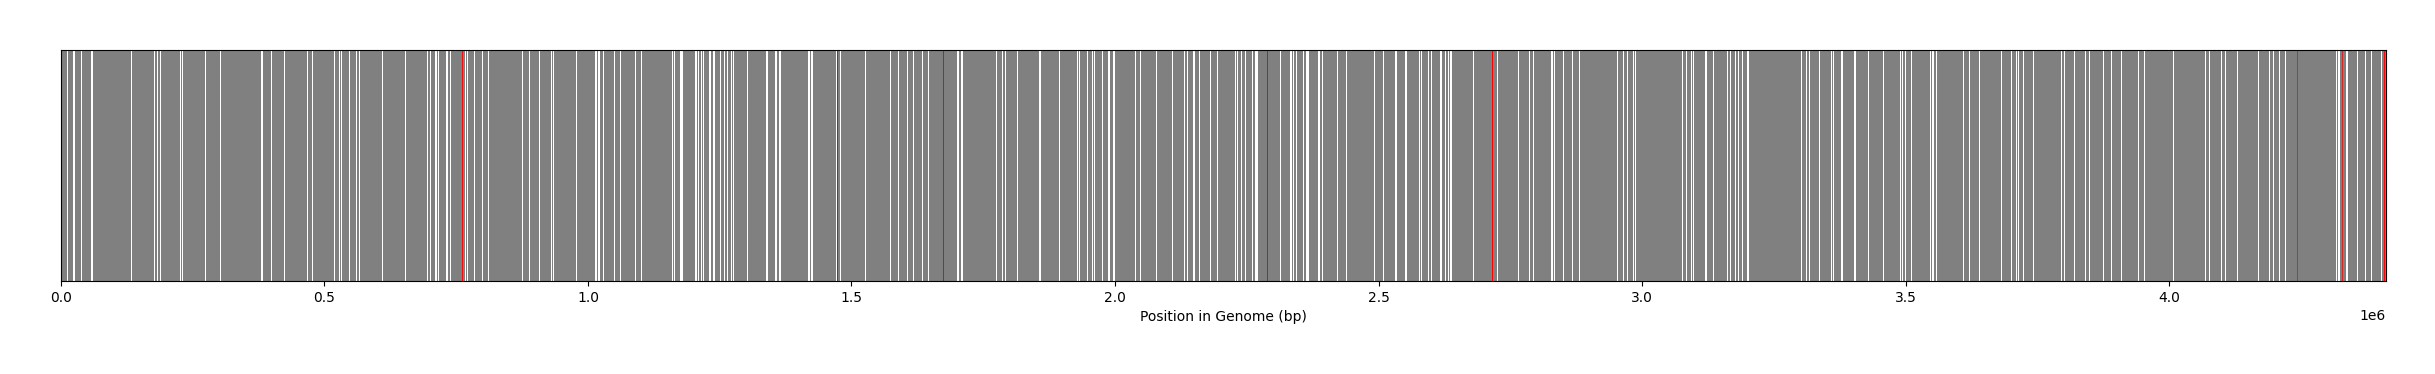

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pycirclize.parser import Gff

# Load your GFF file for Mycobacterium tuberculosis
gff_file = "/content/drive/MyDrive/Data_science_project/data/GCF_000195955.2/genomic.gff"
gff = Gff(gff_file)


genome_length = 4411532


plt.figure(figsize=(30, 3))

for drug, positions in drug_position.items():
    for pos in set(positions):
        plt.axvline(x=pos, color='red')
for i, feat in enumerate(gff.extract_features("gene")):
    start = int(feat.location.start)
    end = int(feat.location.end)
    length = end - start
    plt.barh(1, length, left=start, color='grey', height=1.5)

plt.xlim(0, genome_length)
plt.ylim(0.75, 1.25)
plt.xlabel("Position in Genome (bp)")
plt.yticks([])



plt.show()


In [ ]:
import dask.dataframe as dd

part_2 = dd.read_csv('/content/drive/MyDrive/Data_science_project/final_data_2.csv', delimiter=',', dtype={'GT': 'object'})

grouped_2 = part_2.groupby('Sample ID')['Position'].apply(lambda x: list(x), meta=('Position', object)).compute()

result_dict = grouped_2.to_dict()



In [ ]:

part_3 = dd.read_csv('/content/drive/MyDrive/Data_science_project/final_data_3.csv', delimiter=',', dtype={'GT': 'object'})


grouped_3 = part_3.groupby('Sample ID')['Position'].apply(lambda x: list(x), meta=('Position', object)).compute()


result_dict_3 = grouped_3.to_dict()


In [ ]:

part_0 = dd.read_csv('/content/drive/MyDrive/Data_science_project/final_data_1.csv', delimiter=',', dtype={'GT': 'object'})


grouped_0 = part_0.groupby('Sample ID')['Position'].apply(lambda x: list(x), meta=('Position', object)).compute()


result_dict_0 = grouped_0.to_dict()

In [ ]:
merged_dict =result_dict_0.copy()
for key, value in result_dict.items():
    if key in merged_dict:
        merged_dict[key] += value
    else:
        merged_dict[key] = value



In [ ]:
save_path = '/content/drive/MyDrive/Data_science_project/final_dict.pkl.gz'

In [ ]:
for key, value in result_dict_3.items():
    if key in merged_dict:
        merged_dict[key] += value
    else:
        merged_dict[key] = value

In [ ]:
import pickle
import gzip
with gzip.open(save_path, 'wb',compresslevel=8) as f:
    pickle.dump(merged_dict, f, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
import gzip

# Open the gzip file in binary mode
with gzip.open('/content/drive/MyDrive/Data_science_project/final_dict.pkl.gz', 'rb') as f:
    content = f.read(1000)  # Read the first 1000 bytes
    print(content)


b'\x80\x05\x9549\x01\x00\x00\x00\x00\x00}\x94(\x8c\nSRR1173482\x94X\xaa$\x00\x00[1701, 1821, 1977, 4013, 7362, 7585, 8040, 9304, 11879, 14251, 14785, 16055, 17608, 21795, 24125, 26959, 27463, 30496, 33457, 33551, 34044, 36470, 37031, 37763, 42967, 46815, 55553, 62049, 63771, 69989, 70816, 71336, 74059, 75940, 79504, 80616, 88486, 92199, 104712, 104941, 104942, 104944, 104962, 105045, 111360, 116000, 122107, 122109, 125830, 131174, 132417, 133839, 133862, 146087, 147946, 149323, 150123, 154191, 154283, 157292, 162581, 177857, 178941, 180025, 188800, 194681, 196522, 196642, 203269, 206339, 207226, 212353, 223942, 225323, 227098, 231114, 234477, 234496, 261869, 265554, 278681, 283614, 285772, 285871, 293704, 294012, 302691, 310973, 311338, 311613, 316129, 327897, 332916, 333892, 333917, 336611, 336617, 336620, 337820, 337959, 338020, 338100, 338453, 338903, 338998, 340372, 346275, 356528, 362458, 373282, 376774, 384380, 386432, 387353, 390828, 403364, 403920, 403980, 404326, 408723, 41448

In [ ]:
!pip install gdown



In [ ]:
import gdown

# File ID or full URL of your file
file_id = '1uA1qLiNrSVSvoVxtOxTB4F6gM5cMOg83'
url = f"https://drive.google.com/uc?id={file_id}"
output = 'final_dict.pkl.gz'

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1uA1qLiNrSVSvoVxtOxTB4F6gM5cMOg83
From (redirected): https://drive.google.com/uc?id=1uA1qLiNrSVSvoVxtOxTB4F6gM5cMOg83&confirm=t&uuid=9bb7489b-3e6f-47c6-9017-4bfa12bae8e5
To: /content/final_dict.pkl.gz
100%|██████████| 31.7M/31.7M [00:00<00:00, 139MB/s]


'final_dict.pkl.gz'

In [ ]:
with open('final_dict.pkl.gz', 'rb') as f:
    header = f.read(2)
    print(header)  # Should print b'\x1f\x8b' if it's a valid gzip file


b'<!'


###Streamlit

####Colab version

In [24]:
!pip install pycirclize
!pip install streamlit -q
!pip install pyngrok
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [25]:
%%writefile app.py
import streamlit as st


Writing app.py


In [ ]:

from pyngrok import ngrok

ngrok.set_auth_token("2knKKUxuVy6KxmCgL8groNBOboS_68uz7cFdQH4K1dx641k4H")

!nohup streamlit run app.py --server.port 5011 &

ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

print(' * Tunnel URL:', ngrok_tunnel.public_url)

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pyvis.network import Network
from pycirclize.parser import Gff
import numpy as np
import tempfile
import pickle
@st.cache_data
def load_dataset_1():
    return pd.read_excel('/content/drive/My Drive/Data_science_project/Acession-Numbers.xlsx', header=1)

@st.cache_data
def load_dataset_2():
    return pd.read_excel('/content/drive/My Drive/Data_science_project/Lineage-drug-resitance-classifiation.xlsx', header=1)

@st.cache_data
def load_dataset_3():
    return pd.read_excel('/content/drive/My Drive/Data_science_project/WHO-resistance-associated-mutations.xlsx', header=1)

@st.cache_data
def load_dataset_5():
    load_path = '/content/drive/MyDrive/Data_science_project/final_dict.pkl'
    with open(load_path, 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict


country_origin = load_dataset_1()
lineage_country = load_dataset_2()
resistance_mutations = load_dataset_3()
final_dict = load_dataset_5()


def go_to_main():
    st.session_state['page'] = 'main'
def go_to_resistance_mutations():
    st.session_state['page'] = 'resistance_mutations'

def go_to_genome_data():
    st.session_state['page'] = 'genome_data'
if 'page' not in st.session_state:
    st.session_state['page'] = 'main'
col1, col2, col3 = st.columns(3)
with col1:
  if st.button('Genome Data', key='genome'):
      go_to_genome_data()
with col2:
  if st.button('Resistance Mutations', key='resistance'):
    go_to_resistance_mutations()
with col3:
  if st.button('Back'):
        st.session_state['page'] = 'main'

if st.session_state['page'] == 'main':
  st.title("Mycobacterium tuberculosis - Africa")


  country_counts=country_origin['Country'].value_counts()

  Lineage_resistance_dictionary = lineage_country.set_index('Name')[['Lineage', 'Drug']].T.apply(list).to_dict()

  filtered_lineage_country = lineage_country.dropna(subset=['Lineage'])
  filtered_lineage_country = filtered_lineage_country[filtered_lineage_country['Lineage'] != '-']

  country_ids=lineage_country['Country'].unique().tolist()
  col1, col2 = st.columns(2)

  with col1:
      selected_country = st.selectbox("Select Country", country_ids)


  unique_countries = filtered_lineage_country['Country'].unique()

  filtered_df = filtered_lineage_country[filtered_lineage_country['Country'] == selected_country]

  unique_drugs = filtered_df['Drug'].unique()

  color_map = {drug: color for drug, color in zip(unique_drugs, px.colors.qualitative.Safe)}
  left_col, right_col = st.columns([2, 3])

  with left_col:
    st.subheader(f"Chart for {selected_country}")
    sunburst = px.sunburst(
        filtered_df,
        path=["Drug", "Lineage"],
        values=None,
        color='Drug',
        color_discrete_map=color_map,
        maxdepth=3,
        height=400,
        width=600
    )

    sunburst.update_layout(margin=dict(t=0, l=0, r=0, b=0))
    st.plotly_chart(sunburst, use_container_width=True)



    #pies


  with right_col:
      # First plot
      fig1 = px.sunburst(
          filtered_lineage_country,
          path=['Lineage'],
          values=None,
          color_discrete_sequence=px.colors.qualitative.Set3
      )
      fig1.update_layout(
        margin=dict(t=0, l=0, r=0, b=0),
        height=250,
        width=250
    )
      st.plotly_chart(fig1, use_container_width=True)

      # Second plot
      fig2 = px.sunburst(
          filtered_lineage_country,
          path=['Drug'],
          values=None,
          color_discrete_sequence=px.colors.qualitative.Set3
      )
      fig2.update_layout(
        margin=dict(t=0, l=0, r=0, b=0),
        height=250,
        width=250
    )
      st.plotly_chart(fig2, use_container_width=True)
      plt.close()
      # Third plot
      fig3 = px.sunburst(
          filtered_lineage_country,
          path=['Country'],
          values=None,
          color_discrete_sequence=px.colors.qualitative.Set3
      )
      fig3.update_layout(
        margin=dict(t=0, l=0, r=0, b=0),
        height=250,
        width=250
    )
      st.plotly_chart(fig3, use_container_width=True)


  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  africa = world[(world['continent'] == 'Africa')]
  light_cmap = colors.ListedColormap(['#ffcccb', '#ffe4b5', '#fafad2', '#d3ffce', '#add8e6', '#e6e6fa'])

  fig, ax = plt.subplots(1, 1, figsize=(10, 10))
  africa.plot(ax=ax, cmap=light_cmap, edgecolor='black', linewidth=0.75)

  for idx, row in africa.iterrows():
      country_name = row['name']
      if country_name in country_counts:

          centroid = row['geometry'].centroid
          label = f"{country_name}\n{country_counts[country_name]}"
          ax.text(centroid.x, centroid.y, label,
                  horizontalalignment='center', fontsize=6, color='k', weight="bold")

  plt.title('Number of Samples per Country in Africa')

  st.pyplot(fig)




elif st.session_state['page'] == 'resistance_mutations':
    st.subheader("Resistance Mutations")


    drug_mapping = {
    'AMI': 'Amikacin',
    'BDQ': 'Bedaquiline',
    'CAP': 'Capreomycin',
    'CFZ': 'Clofazimine',
    'DLM': 'Delamanid',
    'EMB': 'Ethambutol',
    'ETH': 'Ethionamide',
    'INH': 'Isoniazid',
    'KAN': 'Kanamycin',
    'LEV': 'Levofloxacin',
    'LZD': 'Linezolid',
    'MXF': 'Moxifloxacin',
    'PZA': 'Pyrazinamide',
    'RIF': 'Rifampicin',
    'STM': 'Streptomycin'}

    drug_position = resistance_mutations.groupby('Drug')['Genomic position '].apply(list).to_dict()
    resistance_mutations['Drug'] = resistance_mutations['Drug'].replace(drug_mapping)
    net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='k', notebook=True, cdn_resources='in_line')
    net.toggle_physics(True)
    for idx, row in resistance_mutations.iterrows():
        drug = row['Drug']
        gene = row['Gene']
        variation = row['Variation']
        added_drugs = set()
        added_variation=set()
        if drug not in added_drugs:
            net.add_node(drug, label=drug, color='green', shape='dot', size=30)
            added_drugs.add(drug)
        if variation not in added_variation:
            net.add_node(variation, label=variation, color='blue', shape='triangle', size=10)
            added_variation.add(variation)


        net.add_edge(drug, variation,label=gene, color='k')
    net.show('drug_gene_network.html')
    st.components.v1.html(open('drug_gene_network.html', 'r').read(), height=750)


elif st.session_state['page'] == 'genome_data':
    st.subheader("Genome Data")
    gff_file = "/content/drive/MyDrive/Data_science_project/data/GCF_000195955.2/genomic.gff"
    Lineage_dictionary=dict(zip(lineage_country['Name'], lineage_country['Lineage']))
    Drug_dictionary=dict(zip(lineage_country['Name'], lineage_country['Drug']))
    country_dictionary=dict(zip(country_origin['Name'], country_origin['Country']))
    drug_position = resistance_mutations.groupby('Drug')['Genomic position '].apply(list).to_dict()
    sample_ids=lineage_country['Name'].unique().tolist()
    selected_sample = st.selectbox("Select Sample ID", sample_ids)

    gff = Gff(gff_file)

    genome_length = 4411532



    @st.cache_data
    def plot_original():
      plt.figure(figsize=(50, 10))


      for drug, positions in drug_position.items():
          for pos in set(positions):
              plt.axvline(x=pos, color='red', linewidth=5)


      for i, feat in enumerate(gff.extract_features("gene")):
          start = int(feat.location.start)
          end = int(feat.location.end)
          length = end - start
          plt.barh(1, length, left=start, color='green', height=1.5)


      plt.xlim(0, genome_length)
      plt.ylim(0.75, 1.25)
      plt.yticks([])

      st.pyplot(plt.gcf())
      plt.close()

    st.write("Places of resistance associated mutations")
    plot_original()

    plt.figure(figsize=(50, 10))
    selected_positions = final_dict.get(selected_sample, [])

    selected_positions = selected_positions.replace('[','').replace(']','').split(',')

    selected_positions = [int(pos.strip()) for pos in selected_positions if pos.strip().isdigit()]
    selected_country=country_dictionary.get(selected_sample)
    selected_lineage=Lineage_dictionary.get(selected_sample)
    selected_drug=Drug_dictionary.get(selected_sample)


    for pos in set(selected_positions):
        plt.axvline(x=int(pos), color='red')



    plt.xlim(0, genome_length)
    plt.ylim(0.75, 1.25)

    plt.yticks([])
    st.write(f"Mutations in: {selected_sample}")
    st.write(f"Country: {selected_country}")
    st.write(f"Lineage: {selected_lineage}")
    st.write(f"Type of resistance: {selected_drug}")

    st.pyplot(plt)
    plt.close()


Overwriting app.py


####Version for the Streamlit Site (Github)

In [47]:
%%writefile app.py

import streamlit as st
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pyvis.network import Network
from pycirclize.parser import Gff
import numpy as np
import requests
import tempfile
import pickle
import gzip
import gdown
import zipfile
import os



def download_file_from_google_drive(url, destination):
    response = requests.get(url)
    response.raise_for_status()
    with open(destination, 'wb') as f:
        f.write(response.content)

URL_DATASET_1 = 'https://drive.google.com/uc?export=download&id=1fvFcosmNcIxqH0dy56aZU4Cizknm777D'
URL_DATASET_2 = 'https://drive.google.com/uc?export=download&id=1HnFDhSOKwybtD7r9-IwHlwQ6tYHrVChv'
URL_DATASET_3 = 'https://drive.google.com/uc?export=download&id=116E6HD17qkspBEyRZOGE-vRpEyKL0JFu'
url='https://drive.google.com/uc?export=download&id=1MWmwHqhv9QBGvRPwFhgU1JFVuxqmQX7w'
url_1 = "https://drive.google.com/uc?export=download&id=1OWyIwV6JD16CPrMcJ-0ma2kOlzHLCX_y"

@st.cache_data
def load_dataset_1():
    dataset=download_file_from_google_drive(URL_DATASET_1, 'Acession-Numbers.xlsx')
    dataset=pd.read_excel('Acession-Numbers.xlsx', header=1)
    return dataset

@st.cache_data
def load_dataset_2():
    download_file_from_google_drive(URL_DATASET_2, 'Lineage-drug-resitance-classifiation.xlsx')
    return pd.read_excel('Lineage-drug-resitance-classifiation.xlsx', header=1)

@st.cache_data
def load_dataset_3():
    download_file_from_google_drive(URL_DATASET_3, 'WHO-resistance-associated-mutations.xlsx')
    return pd.read_excel('WHO-resistance-associated-mutations.xlsx', header=1)
@st.cache_data
def load_dataset_4():
    download_file_from_google_drive(url, 'genomic.gff')
    return Gff('genomic.gff')

@st.cache_data
def load_dataset_5():

    file_id = '1uA1qLiNrSVSvoVxtOxTB4F6gM5cMOg83'
    url = f"https://drive.google.com/uc?id={file_id}"
    output = 'final_dict.pkl.gz'
    gdown.download(url, output, quiet=False)
    with gzip.open('final_dict.pkl.gz', 'rb') as f:
        return pickle.load(f)

@st.cache_data
def load_dataset_6():

    local_zip_filename = "map_files.zip"
    response = requests.get(url_1)
    with open(local_zip_filename, 'wb') as file:
        file.write(response.content)
    with zipfile.ZipFile(local_zip_filename, 'r') as zip_ref:
        zip_ref.extractall("shapefiles")
    shapefile_path = os.path.join("shapefiles", "ne_110m_admin_0_countries.shp")
    map = gpd.read_file(shapefile_path)
    return map


country_origin = load_dataset_1()
lineage_country = load_dataset_2()
resistance_mutations = load_dataset_3()
final_dict = load_dataset_5()
genomic=load_dataset_4()
def go_to_main():
    st.session_state['page'] = 'main'
def go_to_resistance_mutations():
    st.session_state['page'] = 'resistance_mutations'
def go_to_genome_data():
    st.session_state['page'] = 'genome_data'
def go_to_Countries():
    st.session_state['page'] = 'Countries'

if 'page' not in st.session_state:
    st.session_state['page'] = 'main'
if st.button('Back', key='back'):
  st.session_state['page'] = 'main'

col1, col2, col3 = st.columns(3)
with col1:
    if st.button('Countries',key="countries"):
        go_to_Countries()
with col2:
    if st.button('Genome Data', key='genome'):
        go_to_genome_data()
with col3:
    if st.button('Resistance Mutations', key='resistance'):
        go_to_resistance_mutations()




if st.session_state['page'] == 'main':
    st.title("Mycobacterium tuberculosis - Africa")
    country_counts = country_origin['Country'].value_counts()
    @st.cache_data
    def load_africa_data():
        map = load_dataset_6()
        african_countries = [
            'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
            'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
            'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
            'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
            'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
            'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'São Tomé and Príncipe',
            'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
            'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
        ]
        africa = map[map['SOVEREIGNT'].isin(african_countries)]
        return africa

    def plot_africa_map(africa, country_counts):
        light_cmap = colors.ListedColormap(['#ffcccb', '#ffe4b5', '#fafad2', '#d3ffce', '#add8e6', '#e6e6fa'])

        fig, ax = plt.subplots(1, 1, figsize=(20, 20))
        africa.plot(ax=ax, cmap=light_cmap, edgecolor='black', linewidth=1.5)

        for idx, row in africa.iterrows():
            country_name = row['SOVEREIGNT']
            if country_name in country_counts:
                centroid = row['geometry'].centroid
                label = f"{country_name}\n{country_counts[country_name]}"
                ax.text(
                    centroid.x,
                    centroid.y,
                    label,
                    horizontalalignment='center',
                    fontsize=12,
                    color='k',
                    weight='bold'
                )

        plt.title('Number of Occurrences per Country in Africa', fontsize=15)
        return fig


    africa = load_africa_data()


    fig = plot_africa_map(africa, country_counts)


    st.pyplot(fig)
    plt.close()

elif st.session_state['page'] == 'Countries':
    st.subheader("Resistance Mutations")
    filtered_lineage_country = lineage_country.dropna(subset=['Lineage'])
    filtered_lineage_country = filtered_lineage_country[filtered_lineage_country['Lineage'] != '-']
    country_ids = lineage_country['Country'].unique().tolist()
    col1, col2 = st.columns(2)

    with col1:
        selected_country = st.selectbox("Select Country", country_ids)
    unique_countries = filtered_lineage_country['Country'].unique()
    filtered_df = filtered_lineage_country[filtered_lineage_country['Country'] == selected_country]
    unique_drugs = filtered_df['Drug'].unique()
    color_map = {drug: color for drug, color in zip(unique_drugs, px.colors.qualitative.Safe)}
    left_col, right_col = st.columns([2, 3])

    with left_col:
        st.subheader(f"Chart for {selected_country}")
        sunburst = px.sunburst(
            filtered_df,
            path=["Drug", "Lineage"],
            values=None,
            color='Drug',
            color_discrete_map=color_map,
            maxdepth=3,
            height=400,
            width=600
        )
        sunburst.update_layout(margin=dict(t=0, l=0, r=0, b=0))
        st.plotly_chart(sunburst, use_container_width=True)

    with right_col:
        fig1 = px.sunburst(
            filtered_lineage_country,
            path=['Lineage'],
            values=None,
            color_discrete_sequence=px.colors.qualitative.Set3
        )
        fig1.update_layout(
            margin=dict(t=0, l=0, r=0, b=0),
            height=250,
            width=250
        )
        st.plotly_chart(fig1, use_container_width=True)

        fig2 = px.sunburst(
            filtered_lineage_country,
            path=['Drug'],
            values=None,
            color_discrete_sequence=px.colors.qualitative.Set3
        )
        fig2.update_layout(
            margin=dict(t=0, l=0, r=0, b=0),
            height=250,
            width=250
        )
        st.plotly_chart(fig2, use_container_width=True)

        fig3 = px.sunburst(
            filtered_lineage_country,
            path=['Country'],
            values=None,
            color_discrete_sequence=px.colors.qualitative.Set3
        )
        fig3.update_layout(
            margin=dict(t=0, l=0, r=0, b=0),
            height=250,
            width=250
        )
        st.plotly_chart(fig3, use_container_width=True)


elif st.session_state['page'] == 'resistance_mutations':
    st.subheader("Resistance Mutations")
    drug_mapping = {
        'AMI': 'Amikacin',
        'BDQ': 'Bedaquiline',
        'CAP': 'Capreomycin',
        'CFZ': 'Clofazimine',
        'DLM': 'Delamanid',
        'EMB': 'Ethambutol',
        'ETH': 'Ethionamide',
        'INH': 'Isoniazid',
        'KAN': 'Kanamycin',
        'LEV': 'Levofloxacin',
        'LZD': 'Linezolid',
        'MXF': 'Moxifloxacin',
        'PZA': 'Pyrazinamide',
        'RIF': 'Rifampicin',
        'STM': 'Streptomycin'}
    resistance_mutations['Drug'] = resistance_mutations['Drug'].replace(drug_mapping)
    drug_position = resistance_mutations.groupby('Drug')['Genomic position '].apply(list).to_dict()
    net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='k', notebook=True, cdn_resources='in_line')
    net.toggle_physics(True)

    added_drugs = set()
    added_variation = set()
    for idx, row in resistance_mutations.iterrows():
        drug = row['Drug']
        gene = row['Gene']
        variation = row['Variation']
        if drug not in added_drugs:
            net.add_node(drug, label=drug, color='green', shape='dot', size=30)
            added_drugs.add(drug)
        if variation not in added_variation:
            net.add_node(variation, label=variation, color='blue', shape='triangle', size=10)
            added_variation.add(variation)
        net.add_edge(drug, variation, label=gene, color='k')

    net.show('drug_gene_network.html')
    st.components.v1.html(open('drug_gene_network.html', 'r').read(), height=750)


elif st.session_state['page'] == 'genome_data':
    st.subheader("Genome Data")
    Lineage_dictionary=dict(zip(lineage_country['Name'], lineage_country['Lineage']))
    Drug_dictionary=dict(zip(lineage_country['Name'], lineage_country['Drug']))
    country_dictionary=dict(zip(country_origin['Name'], country_origin['Country']))



    genome_length = 4411532
    drug_position = resistance_mutations.groupby('Drug')['Genomic position '].apply(list).to_dict()
    sample_ids = lineage_country['Name'].unique().tolist()
    selected_sample = st.selectbox("Select Sample ID", sample_ids)



    @st.cache_data
    def plot_original():
      plt.figure(figsize=(50, 10))


      for drug, positions in drug_position.items():
          for pos in set(positions):
              plt.axvline(x=pos, color='red', linewidth=5)


      for i, feat in enumerate(genomic.extract_features("gene")):
          start = int(feat.location.start)
          end = int(feat.location.end)
          length = end - start
          plt.barh(1, length, left=start, color='green', height=1.5)


      plt.xlim(0, genome_length)
      plt.ylim(0.75, 1.25)
      plt.yticks([])

      st.pyplot(plt.gcf())
      plt.close()

    st.write("Places of resistance associated mutations")
    plot_original()

    plt.figure(figsize=(50, 10))

    selected_positions = final_dict.get(selected_sample, [])
    selected_positions = selected_positions.replace('[','').replace(']','').split(',')
    selected_positions = [int(pos.strip()) for pos in selected_positions if pos.strip().isdigit()]
    selected_country=country_dictionary.get(selected_sample)
    selected_lineage=Lineage_dictionary.get(selected_sample)
    selected_drug=Drug_dictionary.get(selected_sample)
    for pos in set(selected_positions):
        plt.axvline(x=int(pos), color='red')



    plt.xlim(0, genome_length)
    plt.ylim(0.75, 1.25)

    plt.yticks([])
    st.write(f"Mutations in: {selected_sample}")
    st.write(f"Country: {selected_country}")
    st.write(f"Lineage: {selected_lineage}")
    st.write(f"Type of resistance: {selected_drug}")

    st.pyplot(plt)
    plt.close()



Overwriting app.py


In [48]:
from google.colab import files
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>